# **Data and Evidence CoP**
## Introduction to APIs

We will start by bringing in packages to our coding environment. These packages contain functions that allow us to do different things within our code.

We will be using:
- `requests`: a package for interacting with APIs
- `pandas`: given the short-form `pd`, is a package for working with dataframes, a type of data structure in Python that resembles a table

In [1]:
import requests
import pandas as pd

Now that we have installed all the functions that we need, we can start to define some variables that we need to access our data.

We can use API documentation to get information on how to access certain data. We will be looking at the EA hydrology API, so let's look at the documentation for this API.

https://environment.data.gov.uk/hydrology/doc/reference

To begin with, let's look at accessing some information on monitoring stations in the dataset.

In [2]:
base_url = "http://environment.data.gov.uk/hydrology/id/stations"
print(base_url)

http://environment.data.gov.uk/hydrology/id/stations


If we visit that link, we can see it returns a lot of stations, 100 in fact. This is because that is the soft limit of the API, meaning that unless we specify a limit, or there are fewer than 100 items in the request, it will display the first 100 entries.
Let's set a limit so we only get the first ten entries.

Note that we have already defined the base url and the stations url, so we don't need to do this again.
To add a query to our URL, we first need to add a `?` and then we define our query. We put an `&` between each query if we have more than one.

In this cell, we define the text, also called a string, that sets a limit, and we join it onto the end of our URL.

In [3]:
limit_query = "?_limit=10"
stations_10_url = base_url + limit_query
print(stations_10_url)

http://environment.data.gov.uk/hydrology/id/stations?_limit=10


Now that we're familiar with constructing a URL for accessing data, let's expand on this work by using the `requests` library to bring this data into our environment.

We use the `requests.get()` function to do this. 

This link provides more information on this method: 
https://www.w3schools.com/PYTHON/ref_requests_get.asp#:~:text=The%20get%28%29%20method%20sends%20a%20GET%20request%20to,timeout%3D2.50%29%20Required.%20The%20url%20of%20the%20request%20Optional

In summary, the get() method sends a GET request. We provide it with a URL, and it accesses this URL, and simply "gets" some information from it.

Let's put our stations_10_url into the function. 

In [4]:
stations_10_response = requests.get(stations_10_url)
print(stations_10_response)

<Response [200]>


If we print our return from this function, it tells us that the status code of the response was 200. This means the request was successful. You don't need to understand status codes in much detail, but a status code of 200 will mean the response was received successfully.

Let's view the response.

We use an if statement in the code block. This just says: if the status code was 200, do this, and if the status code was anything else, do that.

First, we are going to take the response, and put it into a JSON format. We are going to print the keys to the JSON response so we can see what content was included in the JSON we recieved.

In [5]:
if stations_10_response.status_code == 200:
    stations_10_json = stations_10_response.json()
    print(stations_10_json.keys())
else:
    print(f"Error: {stations_10_response.status_code}")

dict_keys(['meta', 'items'])


We can see that the JSON is made of two main elements, the `meta` and the `items`.

Meta contains metadata on things such as publisher and licenses.

In our case, we are interested in the items section, as this contains information on each station.

Let's look into the items in more detail.

In [6]:
stations = stations_10_json['items']
stations[0]

{'@id': 'http://environment.data.gov.uk/hydrology/id/stations/052d0819-2a32-47df-9b99-c243c9c8235b',
 'label': 'Ulting Sarasota',
 'notation': '052d0819-2a32-47df-9b99-c243c9c8235b',
 'easting': 581271,
 'northing': 208591,
 'lat': 51.746683,
 'long': 0.624437,
 'type': [{'@id': 'http://environment.data.gov.uk/flood-monitoring/def/core/Station'},
  {'@id': 'http://environment.data.gov.uk/flood-monitoring/def/core/RiverStation'},
  {'@id': 'http://environment.data.gov.uk/reference/def/core/SamplingLocation'},
  {'@id': 'http://environment.data.gov.uk/flood-monitoring/def/core/RiverFlow'}],
 'riverName': 'River Chelmer',
 'stationGuid': '052d0819-2a32-47df-9b99-c243c9c8235b',
 'wiskiID': '037048U',
 'dateOpened': '2008-10-31',
 'observedProperty': [{'@id': 'http://environment.data.gov.uk/reference/def/op/waterFlow'}],
 'status': [{'@id': 'http://environment.data.gov.uk/flood-monitoring/def/core/statusActive',
   'label': 'Active'}],
 'measures': [{'@id': 'http://environment.data.gov.uk/h

We have successfully pulled in data from an API into our environment in JSON format.

After a while you get used to reading data in JSON format, but it isn't the nicest thing to view. Let's convert it to a DataFrame.

A DataFrame is a way of displaying data in a table format. It is much easier to look at and work with.

In [7]:
stations_df = pd.DataFrame(stations)
stations_df

,@id,label,notation,easting,northing,lat,long,type,riverName,stationGuid,...,observedProperty,status,measures,stationReference,RLOIid,rloiStationLink,catchmentArea,nrfaStationID,nrfaStationURL,statusReason
0,http://environment.data.gov.uk/hydrology/id/st...,Ulting Sarasota,052d0819-2a32-47df-9b99-c243c9c8235b,581271,208591,51.746683,0.624437,[{'@id': 'http://environment.data.gov.uk/flood...,River Chelmer,052d0819-2a32-47df-9b99-c243c9c8235b,...,[{'@id': 'http://environment.data.gov.uk/refer...,[{'@id': 'http://environment.data.gov.uk/flood...,[{'@id': 'http://environment.data.gov.uk/hydro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://environment.data.gov.uk/hydrology/id/st...,Beggearn Huish,48513a18-e485-4317-ae92-93bf4f7f3e54,304007,139460,51.146322,-3.373695,[{'@id': 'http://environment.data.gov.uk/flood...,Washford River,48513a18-e485-4317-ae92-93bf4f7f3e54,...,[{'@id': 'http://environment.data.gov.uk/refer...,[{'@id': 'http://environment.data.gov.uk/flood...,[{'@id': 'http://environment.data.gov.uk/hydro...,51107,3089,{'@id': 'https://check-for-flooding.service.go...,36.3,51003,https://nrfa.ceh.ac.uk/data/station/info/51003...,NaN
2,http://environment.data.gov.uk/hydrology/id/st...,Adwick,f22f80f8-1bb0-4e77-b225-291487060c6f,447677,402022,53.512713,-1.282505,[{'@id': 'http://environment.data.gov.uk/flood...,River Dearne,f22f80f8-1bb0-4e77-b225-291487060c6f,...,[{'@id': 'http://environment.data.gov.uk/refer...,[{'@id': 'http://environment.data.gov.uk/flood...,[{'@id': 'http://environment.data.gov.uk/hydro...,F0803,8002,{'@id': 'https://check-for-flooding.service.go...,311.0,27030,https://nrfa.ceh.ac.uk/data/station/info/27030...,NaN
3,http://environment.data.gov.uk/hydrology/id/st...,Wellesbourne,95a1245a-5329-4a2b-9024-d70ebe9707df,427271,255587,52.197839,-1.602416,[{'@id': 'http://environment.data.gov.uk/flood...,River Dene,95a1245a-5329-4a2b-9024-d70ebe9707df,...,[{'@id': 'http://environment.data.gov.uk/refer...,[{'@id': 'http://environment.data.gov.uk/flood...,[{'@id': 'http://environment.data.gov.uk/hydro...,2048,2029,{'@id': 'https://check-for-flooding.service.go...,NaN,54048,https://nrfa.ceh.ac.uk/data/station/info/54048...,NaN
4,http://environment.data.gov.uk/hydrology/id/st...,Thorverton,3c4d4f78-2d0e-474a-b884-65a9daca18fb,293602,101602,50.804172,-3.511302,[{'@id': 'http://environment.data.gov.uk/flood...,River Exe,3c4d4f78-2d0e-474a-b884-65a9daca18fb,...,[{'@id': 'http://environment.data.gov.uk/refer...,[{'@id': 'http://environment.data.gov.uk/flood...,[{'@id': 'http://environment.data.gov.uk/hydro...,45118,3260,{'@id': 'https://check-for-flooding.service.go...,600.9,45001,https://nrfa.ceh.ac.uk/data/station/info/45001...,NaN
5,http://environment.data.gov.uk/hydrology/id/st...,Iwood,959f3e4f-bb6e-4f4a-8082-0157eea99482,345173,163064,51.363977,-2.788890,[{'@id': 'http://environment.data.gov.uk/flood...,Congresbury Yeo,959f3e4f-bb6e-4f4a-8082-0157eea99482,...,[{'@id': 'http://environment.data.gov.uk/refer...,[{'@id': 'http://environment.data.gov.uk/flood...,[{'@id': 'http://environment.data.gov.uk/hydro...,52204,"[3060, 3416]",[{'@id': 'https://check-for-flooding.service.g...,NaN,52017,https://nrfa.ceh.ac.uk/data/station/info/52017...,NaN
6,http://environment.data.gov.uk/hydrology/id/st...,Coniston Upstream,fbecd84a-70b6-4725-80ba-67c7adb3cae7,330639,497190,54.365471,-3.069004,[{'@id': 'http://environment.data.gov.uk/flood...,Church Beck,fbecd84a-70b6-4725-80ba-67c7adb3cae7,...,[{'@id': 'http://environment.data.gov.uk/refer...,[{'@id': 'http://environment.data.gov.uk/flood...,[{'@id': 'http://environment.data.gov.uk/hydro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,http://environment.data.gov.uk/hydrology/id/st...,Sheepwash,70f658a0-3d32-47db-a97c-ed5e25da46f2,397397,291756,52.523665,-2.039788,[{'@id': 'http://environment.data.gov.uk/flood...,River Tame,70f658a0-3d32-47db-a97c-ed5e25da46f2,...,[{'@id': 'http://environment.data.gov.uk/refer...,[{'@id': 'http://environment.data.gov.uk/flood...,[{'@id': 'http://environment.data.gov.uk

We have successfully pulled in data using an API.

This isn't the most interesting dataset though. Let's access some slightly more interesting data and use a more complex query than just a limit.

We are going to make use of API documentation to do this. A good API should have documentation that goes alongside it. This documentation will tell you how you can access different parts of the data, and how you can query the data. Let's look at the API documentation for this data:

https://environment.data.gov.uk/hydrology/doc/reference#readings-section

We can define the `parameters` of our query and use them in our request. This is a nicer way of writing a request than making a longer and longer URL.

The block of code below puts everything together that we have covered, and also introduces the `params` query method. While using Python to access data via an API might seem complicated right now, you can start to see that there really isn't too many steps to it.

In [8]:
readings_url = "https://environment.data.gov.uk/hydrology/data/readings.json"

params = {
    "station": "052d0819-2a32-47df-9b99-c243c9c8235b",
    "observedProperty": "waterFlow",
    "mineq-date": "2025-01-01",
    "maxeq-date": "2025-01-07"
}

reading_response = requests.get(readings_url, params=params)
print(reading_response.url)

if reading_response.status_code == 200:
    flow_json = reading_response.json()
    flow_df = pd.DataFrame(flow_json['items'])
    print("Success")
else:
    print("Error")

flow_df

https://environment.data.gov.uk/hydrology/data/readings.json?station=052d0819-2a32-47df-9b99-c243c9c8235b&observedProperty=waterFlow&mineq-date=2025-01-01&maxeq-date=2025-01-07
Success


,measure,date,dateTime,value,quality,valid,invalid,missing,completeness
0,{'@id': 'http://environment.data.gov.uk/hydrol...,2025-01-01,2025-01-01T00:00:00,1.607,Unchecked,NaN,NaN,NaN,NaN
1,{'@id': 'http://environment.data.gov.uk/hydrol...,2025-01-01,2025-01-01T00:15:00,1.543,Unchecked,NaN,NaN,NaN,NaN
2,{'@id': 'http://environment.data.gov.uk/hydrol...,2025-01-01,2025-01-01T00:30:00,1.575,Unchecked,NaN,NaN,NaN,NaN
3,{'@id': 'http://environment.data.gov.uk/hydrol...,2025-01-01,2025-01-01T00:45:00,1.559,Unchecked,NaN,NaN,NaN,NaN
4,{'@id': 'http://environment.data.gov.uk/hydrol...,2025-01-01,2025-01-01T01:00:00,1.484,Unchecked,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
682,{'@id': 'http://environment.data.gov.uk/hydrol...,2025-01-04,2025-01-04T09:00:00,2.912,Unchecked,10000,0,0,Complete
683,{'@id': 'http://environment.data.gov.uk/hydrol...,2025-01-05,2025-01-05T09:00:00,16.247,Unchecked,10000,0,0,Complete
684,{'@id': 'http://environment.data.gov.uk/hydrol...,2025-01-06,2025-01-06T09:00:00,27.195,Unchecked,10000,0,0,Complete
685,{'@id': 'http://environment.data.gov.uk/hydrol...,2025-01-07,2025-01-07T09:00:00,23.849,Unchecked,10000,0,0,Complete


To demonstrate what is possible, here is a few lines of code to visualise this data

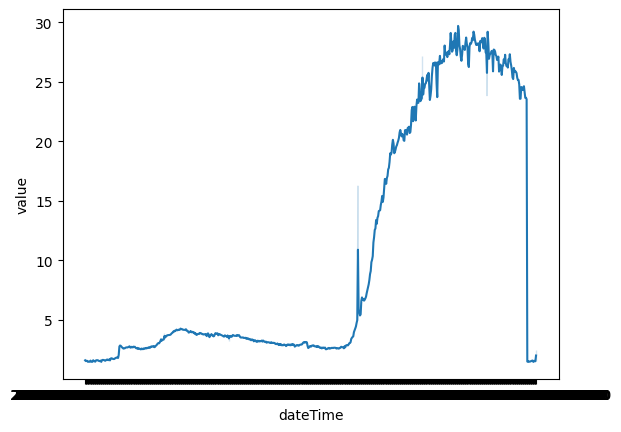

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(y="value", x="dateTime", data=flow_df)

plt.show()

Not a great looking plot. Let's neaten up the axes by adding some appropriate ticks and labels, as well as a title for the chart.

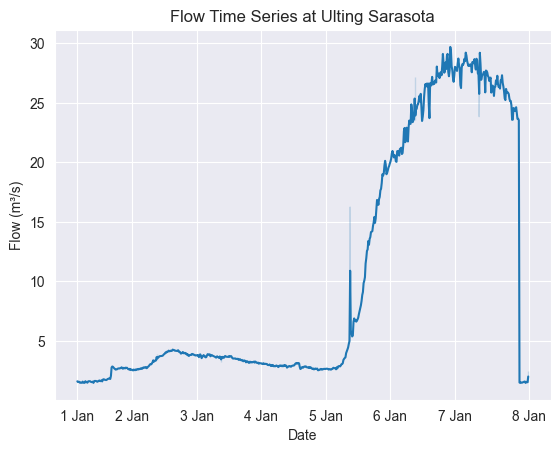

In [10]:
sns.set_style("darkgrid")

g = sns.lineplot(y="value", x="dateTime", data=flow_df)

g.set_xticks([
    "2025-01-01T00:00:00",
    "2025-01-02T00:00:00",
    "2025-01-03T00:00:00",
    "2025-01-04T00:00:00",
    "2025-01-05T00:00:00",
    "2025-01-06T00:00:00",
    "2025-01-07T00:00:00",
    "2025-01-08T00:00:00"
],
[
    "1 Jan",
    "2 Jan",
    "3 Jan",
    "4 Jan",
    "5 Jan",
    "6 Jan",
    "7 Jan",
    "8 Jan"
])

plt.xlabel("Date")
plt.ylabel("Flow (m³/s)")
plt.title("Flow Time Series at Ulting Sarasota")

plt.show()

This has been a very quick introduction to this topic. If you want to learn more about this work, I recommend making use of our partnership with DataCamp. They offer interactive courses on a variety of topics relating to working with data.

If you are new to Python, I recommend starting with the Introduction to Python course, which teaches you the basics of Python in just a few hours.

https://app.datacamp.com/learn/courses/intro-to-python-for-data-science

After completing this, it is worth making use of the Python Fundamentals skill track, which is a collection of courses that build on from each other. By the end you should have a good idea of the basics of Python and are ready to start looking into more specific uses.

https://app.datacamp.com/learn/skill-tracks/python-data-fundamentals

After completing this, or if you already have a bit of experience working with Python and want to learn more on working with APIs, then I recommend the Importing and Cleaning Data in Python skill track. This collection of courses looks at lots of the content we have explored today, but gives you much more content and will teach you how to import data from files and the internet, and then how to clean the data so it is easier to work with. By the end of this skill track, you should have a good level of skills for working with APIs and will be more than ready to start work on your own projects.

https://app.datacamp.com/learn/skill-tracks/importing-cleaning-data-with-python